In [2]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [3]:
#import data

df = pd.read_csv('/Users/daniyalrosli/reviewsense/amazon_reviews.csv')



In [4]:
#data information

print(df.head())
print(df.info())
print(df.describe())
print(df.columns)

   Unnamed: 0  reviewerName  overall  \
0           0           NaN      4.0   
1           1          0mie      5.0   
2           2           1K3      4.0   
3           3           1m2      5.0   
4           4  2&amp;1/2Men      5.0   

                                          reviewText  reviewTime  day_diff  \
0                                         No issues.  2014-07-23       138   
1  Purchased this for my device, it worked as adv...  2013-10-25       409   
2  it works as expected. I should have sprung for...  2012-12-23       715   
3  This think has worked out great.Had a diff. br...  2013-11-21       382   
4  Bought it with Retail Packaging, arrived legit...  2013-07-13       513   

   helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
0            0           0           0                   0   
1            0           0           0                   0   
2            0           0           0                   0   
3            0           0           0    

Unnamed: 0              0
reviewerName            0
overall                 0
reviewText              0
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64
0
0


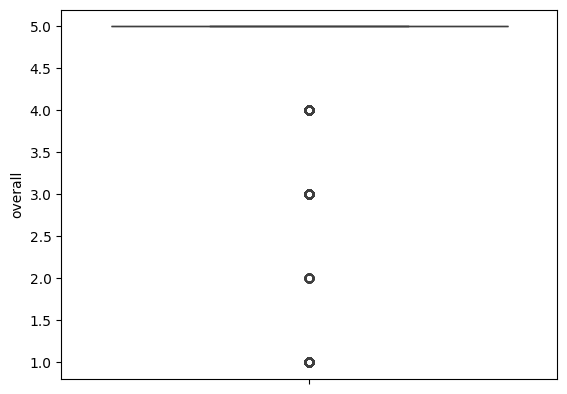

In [10]:
#data cleaning and preprocessing

#check for missing values
print(df.isnull().sum())
print (df.isnull().sum().sum())

#check for duplicates
print(df.duplicated().sum())

#check for outliers
sns.boxplot(df['overall'])
plt.show()

df.drop_duplicates(inplace=True)
df.dropna(inplace=True)




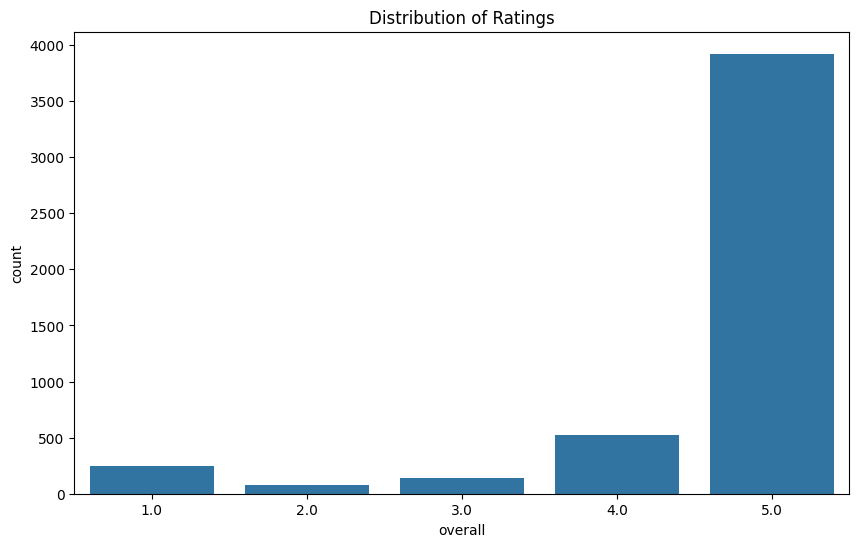

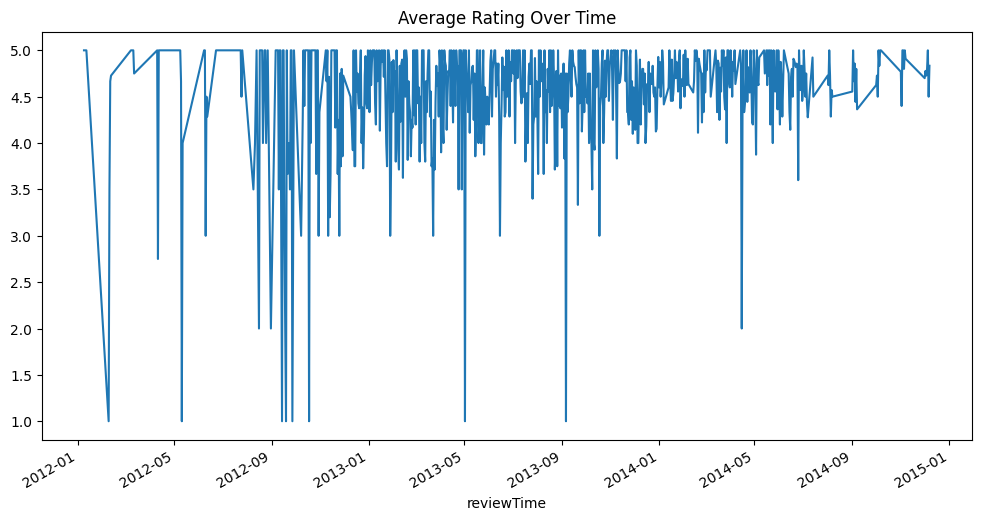

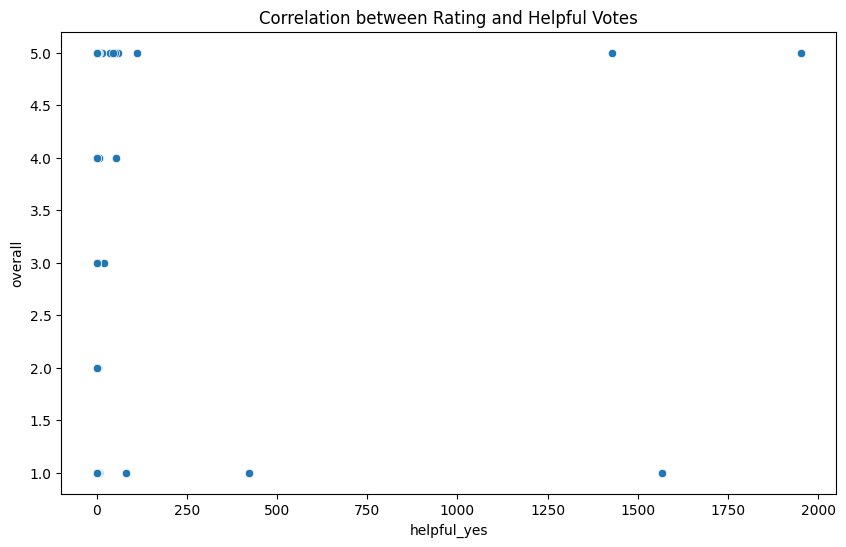

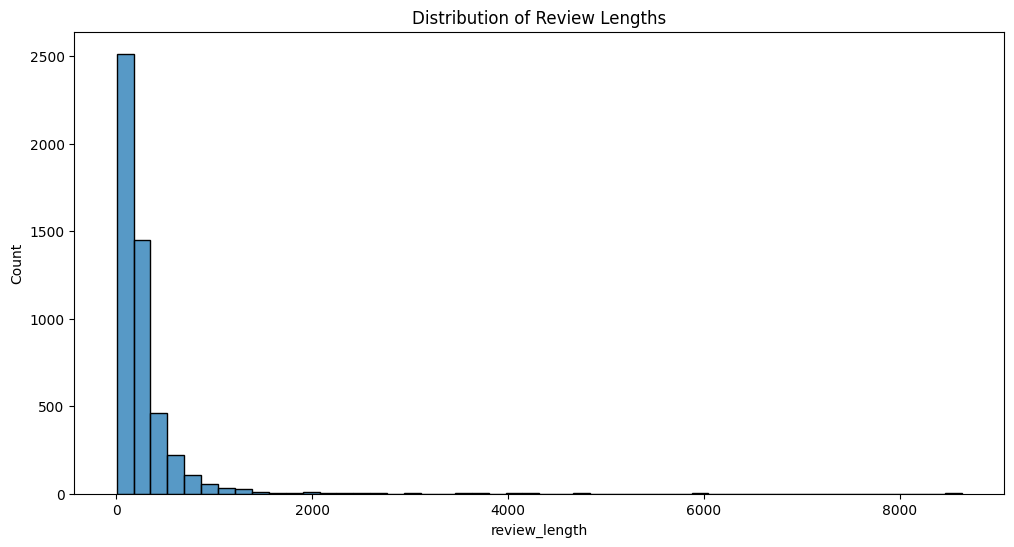

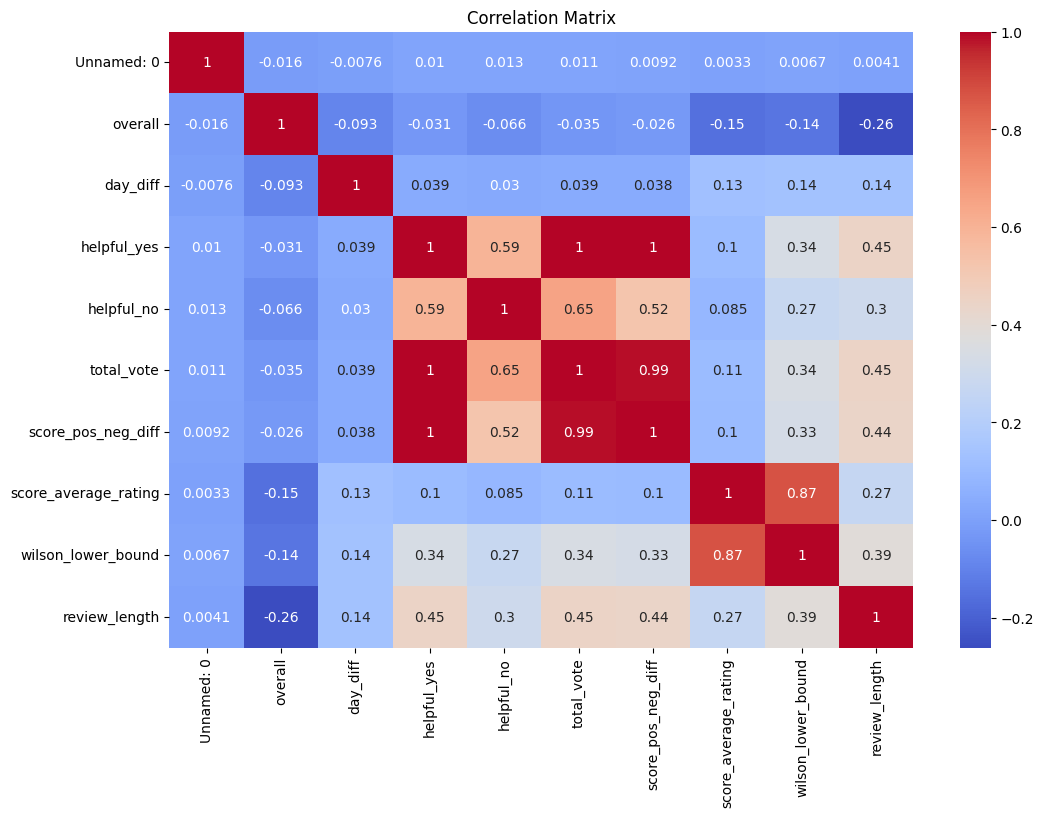


Summary Statistics by Rating:
         helpful_yes  helpful_no  total_vote
overall                                     
1.0         8.967213    1.430328   10.397541
2.0         0.237500    0.300000    0.537500
3.0         0.352113    0.190141    0.542254
4.0         0.212928    0.395437    0.608365
5.0         1.038766    0.108391    1.147156


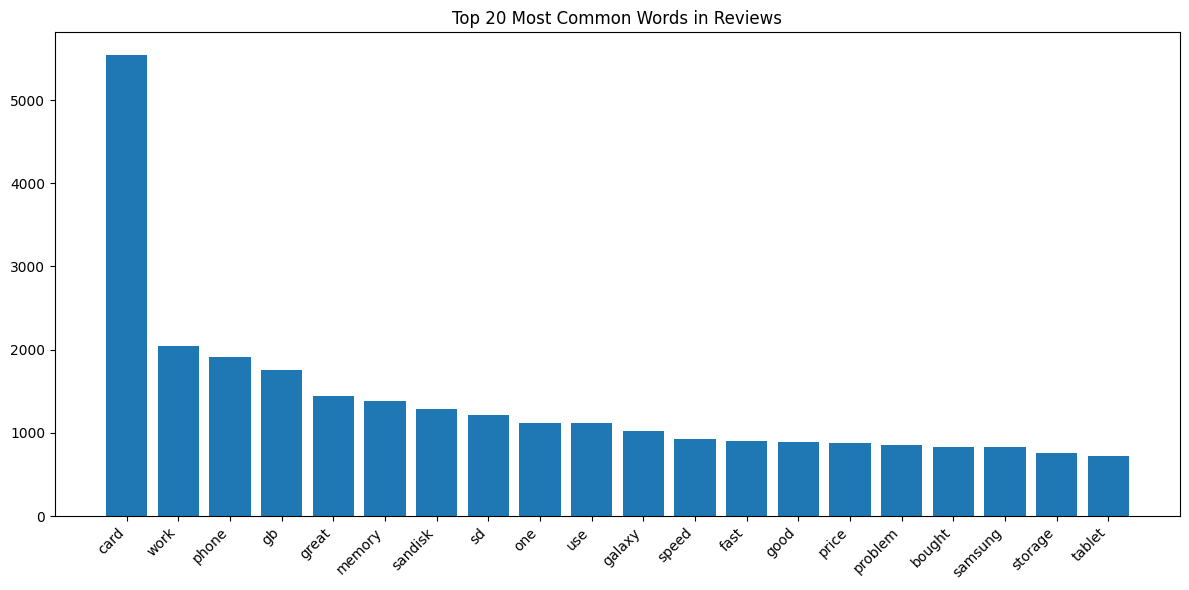

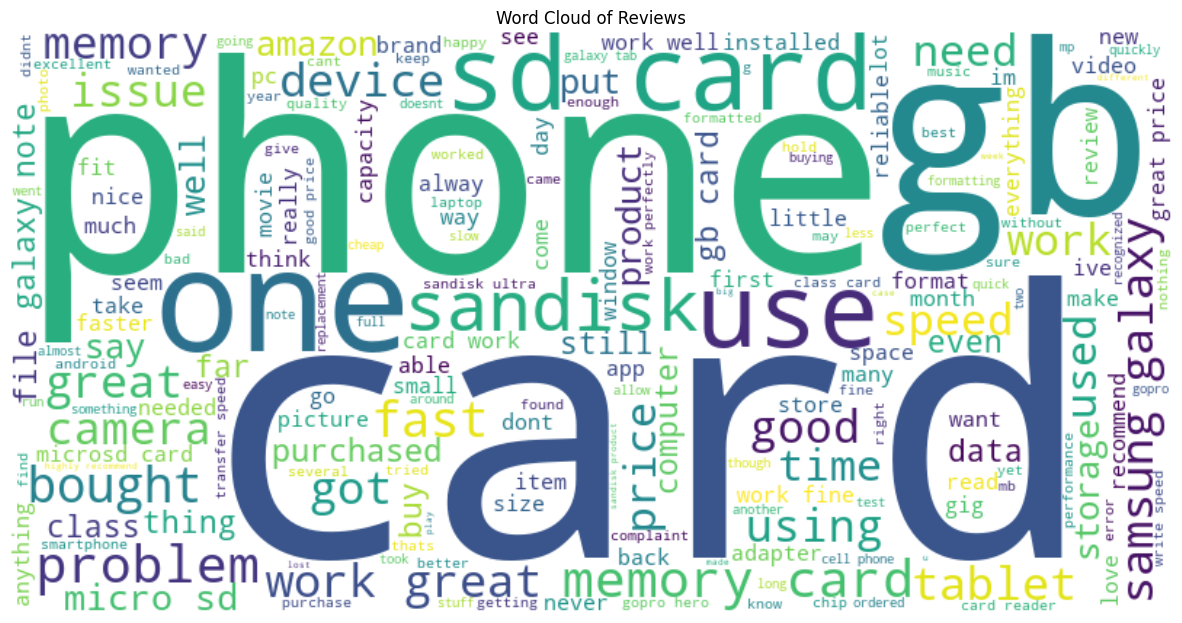

In [23]:
from collections import Counter
from wordcloud import WordCloud

#exploaratory data analysis

# Distribution of ratings
plt.figure(figsize=(10,6))
sns.countplot(x='overall', data=df)
plt.title('Distribution of Ratings')
plt.show()

# Time series analysis of ratings
df['reviewTime'] = pd.to_datetime(df['reviewTime'])
plt.figure(figsize=(12,6))
df.groupby('reviewTime')['overall'].mean().plot()
plt.title('Average Rating Over Time')
plt.show()

# Helpful votes analysis
plt.figure(figsize=(10,6))
sns.scatterplot(x='helpful_yes', y='overall', data=df)
plt.title('Correlation between Rating and Helpful Votes')
plt.show()

# Distribution of review lengths
df['review_length'] = df['reviewText'].str.len()
plt.figure(figsize=(12,6))
sns.histplot(df['review_length'], bins=50)
plt.title('Distribution of Review Lengths')
plt.show()

# Correlation heatmap
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Summary statistics by rating
print("\nSummary Statistics by Rating:")
print(df.groupby('overall')[['helpful_yes', 'helpful_no', 'total_vote']].mean())

# Word frequency analysis
import matplotlib.pyplot as plt

# Create word frequency distribution
all_words = ' '.join(df['cleaned_review']).split()
word_freq = Counter(all_words).most_common(20)

# Plot word frequency bar chart
plt.figure(figsize=(12, 6))
words, counts = zip(*word_freq)
plt.bar(words, counts)
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Most Common Words in Reviews')
plt.tight_layout()
plt.show()

# Generate and plot word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [24]:
#feature engineering

# Creating sentiment-related features
df['word_count'] = df['cleaned_review'].str.split().str.len()
df['avg_word_length'] = df['cleaned_review'].str.len() / df['word_count']

# Create features from helpful votes
df['helpful_ratio'] = df['helpful_yes'] / df['total_vote'].where(df['total_vote'] > 0, 1)
df['has_helpful_votes'] = df['helpful_yes'] > 0

# Time-based features
df['review_month'] = df['reviewTime'].dt.month
df['review_year'] = df['reviewTime'].dt.year
df['is_recent'] = (df['day_diff'] <= df['day_diff'].median()).astype(int)

# Rating-based features
df['is_positive'] = (df['overall'] >= 4).astype(int)
df['is_negative'] = (df['overall'] <= 2).astype(int)
df['rating_diff_from_mean'] = df['overall'] - df['overall'].mean()

# Text-based features
df['contains_numbers'] = df['reviewText'].str.contains('\d').astype(int)
df['exclamation_count'] = df['reviewText'].str.count('!')


In [12]:
	
# Print out the statistics of numeric variables:
df.describe()

,Unnamed: 0,overall,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,review_length
count,4913.000000,4913.000000,4913,4913.000000,4913.000000,4913.000000,4913.000000,4913.000000,4913.000000,4913.000000,4913.000000
mean,2457.974761,4.587625,2013-09-26 15:41:26.220231936,437.346224,1.311215,0.210258,1.521474,1.100957,0.075363,0.020019,267.799919
min,1.000000,1.000000,2012-01-09 00:00:00,1.000000,0.000000,0.000000,0.000000,-130.000000,0.000000,0.000000,3.000000
25%,1230.000000,5.000000,2013-04-16 00:00:00,281.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,123.000000
50%,2458.000000,5.000000,2013-10-03 00:00:00,431.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,172.000000
75%,3686.000000,5.000000,2014-03-02 00:00:00,601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,289.000000
max,4914.000000,5.000000,2014-12-07 00:00:00,1064.000000,1952.000000,183.000000,2020.000000,1884.000000,1.000000,0.957544,8638.000000
std,1418.447891,0.996995,NaN,209.360537,41.627627,4.024098,44.132066,39.375960,0.255973,0.077156,328.877502


In [13]:
# findings

# Key findings from the dataset
print("Key Findings:\n")

# Rating distribution
rating_dist = df['overall'].value_counts().sort_index()
print("1. Rating Distribution:")
print(rating_dist)
print(f"Average rating: {df['overall'].mean():.2f}\n")

# Review length analysis
print("2. Review Length Analysis:")
print(f"Average review length: {df['review_length'].mean():.0f} characters")
print(f"Shortest review: {df['review_length'].min()} characters")
print(f"Longest review: {df['review_length'].max()} characters\n")

# Helpfulness analysis
print("3. Review Helpfulness:")
print(f"Total helpful votes: {df['helpful_yes'].sum()}")
print(f"Average helpful votes per review: {df['helpful_yes'].mean():.2f}\n")

# Time span analysis
print("4. Time Analysis:")
print(f"Date range: {df['reviewTime'].min().date()} to {df['reviewTime'].max().date()}")
print(f"Average review age: {df['day_diff'].mean():.0f} days\n")

# Correlation findings
correlation = df['overall'].corr(df['helpful_yes'])
print("5. Correlation:")
print(f"Correlation between rating and helpful votes: {correlation:.3f}")

Key Findings:

1. Rating Distribution:
overall
1.0     244
2.0      80
3.0     142
4.0     526
5.0    3921
Name: count, dtype: int64
Average rating: 4.59

2. Review Length Analysis:
Average review length: 268 characters
Shortest review: 3 characters
Longest review: 8638 characters

3. Review Helpfulness:
Total helpful votes: 6442
Average helpful votes per review: 1.31

4. Time Analysis:
Date range: 2012-01-09 to 2014-12-07
Average review age: 437 days

5. Correlation:
Correlation between rating and helpful votes: -0.031


In [22]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download required NLTK data if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

#text cleaning

# Function to clean text
def clean_text(text):
    if pd.isnull(text):
        return ''  # Return empty string if text is NaN
    text = str(text).lower()  # Lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and numbers
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return ' '.join(tokens)

# Apply cleaning function to reviewText
df['cleaned_review'] = df['reviewText'].apply(clean_text)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/daniyalrosli/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/daniyalrosli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/daniyalrosli/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/daniyalrosli/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!



Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.85      0.18      0.30        93
           1       0.92      1.00      0.96       890

    accuracy                           0.92       983
   macro avg       0.89      0.59      0.63       983
weighted avg       0.91      0.92      0.90       983



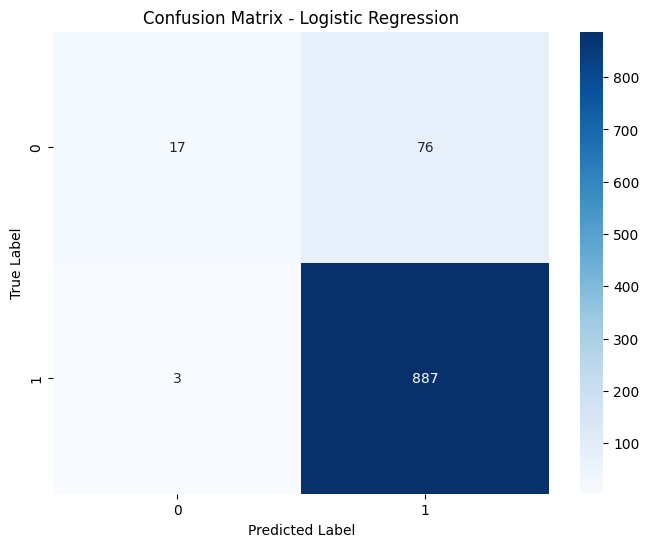


Linear SVC Results:
              precision    recall  f1-score   support

           0       0.74      0.48      0.58        93
           1       0.95      0.98      0.96       890

    accuracy                           0.93       983
   macro avg       0.84      0.73      0.77       983
weighted avg       0.93      0.93      0.93       983



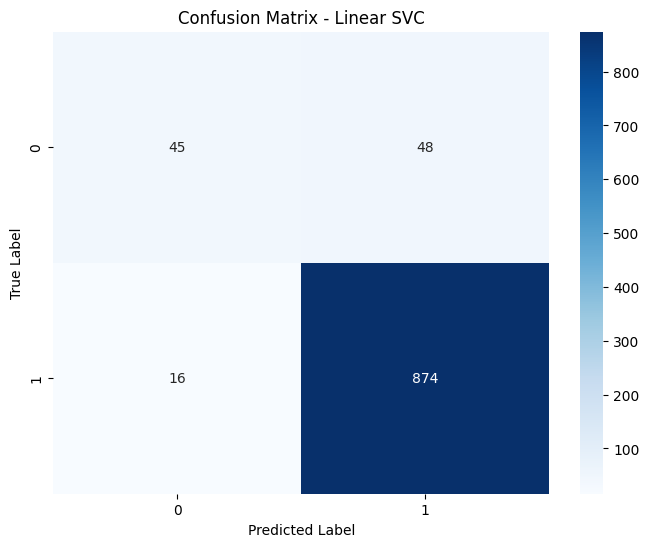


Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        93
           1       0.91      1.00      0.95       890

    accuracy                           0.90       983
   macro avg       0.45      0.50      0.47       983
weighted avg       0.82      0.90      0.86       983



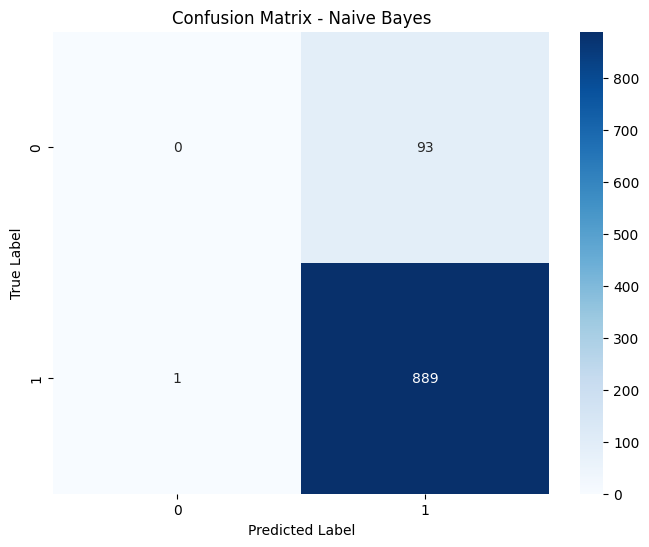


Random Forest Results:
              precision    recall  f1-score   support

           0       0.70      0.08      0.14        93
           1       0.91      1.00      0.95       890

    accuracy                           0.91       983
   macro avg       0.81      0.54      0.54       983
weighted avg       0.89      0.91      0.87       983



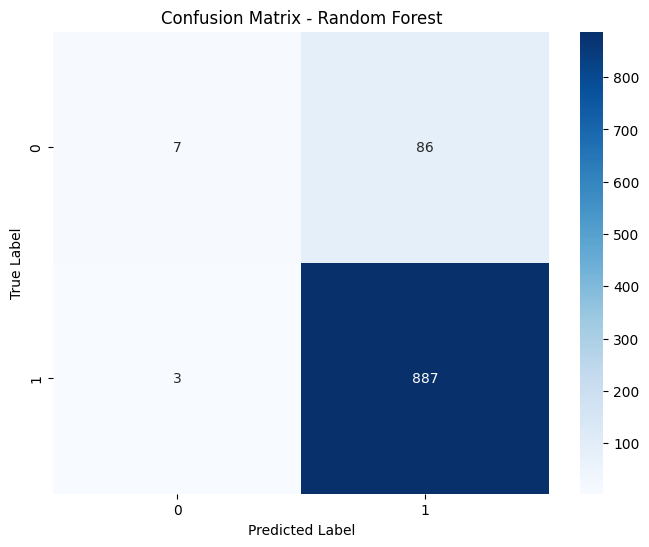


Model Comparison:
                     precision    recall  f1-score
Logistic Regression   0.914355  0.919634  0.895258
Linear SVC            0.928049  0.934893  0.928704
Naive Bayes           0.819647  0.904374  0.859929
Random Forest         0.891593  0.909461  0.874998


<Figure size 1000x600 with 0 Axes>

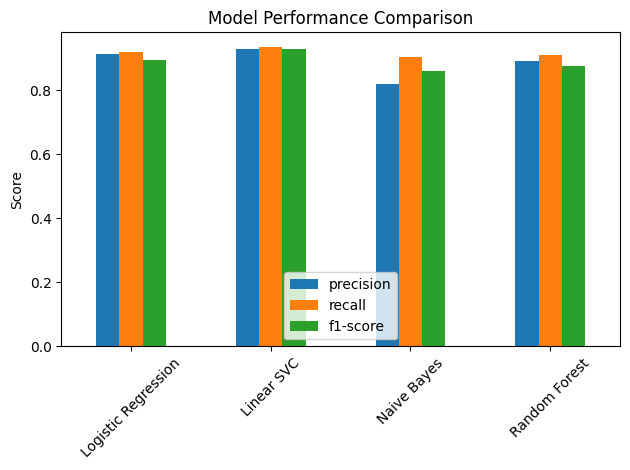

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Create binary sentiment labels (1 for positive, 0 for negative/neutral)
df['sentiment'] = (df['overall'] >= 4).astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_review'], 
    df['sentiment'],
    test_size=0.2,
    random_state=42
)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Linear SVC': LinearSVC(random_state=42),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Train model
    model.fit(X_train_tfidf, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_tfidf)
    
    # Get metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = report['weighted avg']
    
    # Print results
    print(f"\n{name} Results:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Compare models
model_comparison = pd.DataFrame(results).T[['precision', 'recall', 'f1-score']]
print("\nModel Comparison:")
print(model_comparison)

# Plot model comparison
plt.figure(figsize=(10, 6))
model_comparison.plot(kind='bar')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Model Evaluation Summary:

Model Performance Metrics:
                     precision    recall  f1-score
Logistic Regression   0.914355  0.919634  0.895258
Linear SVC            0.928049  0.934893  0.928704
Naive Bayes           0.819647  0.904374  0.859929
Random Forest         0.891593  0.909461  0.874998

Generating Performance Plots...


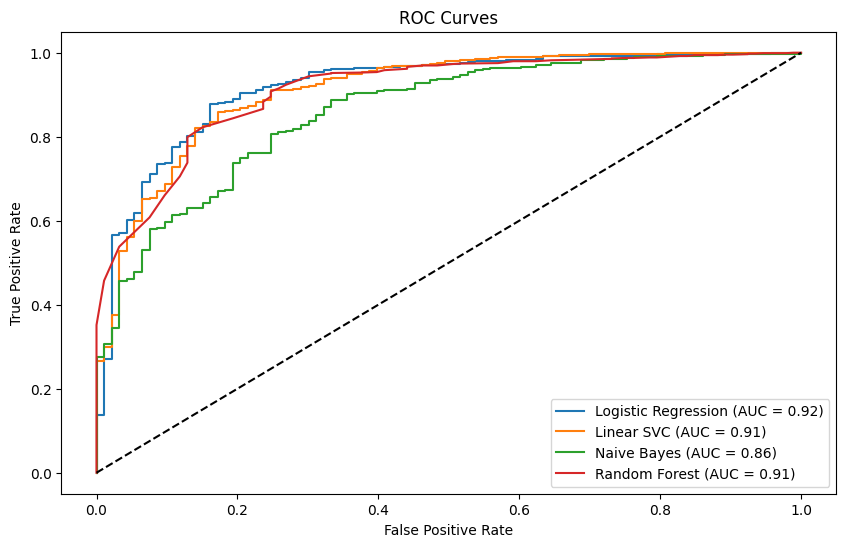

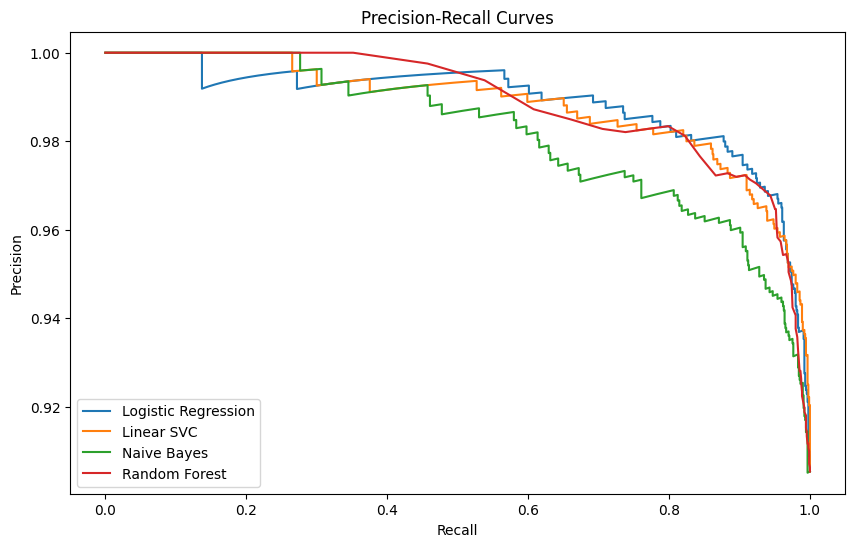


Analyzing Feature Importance...


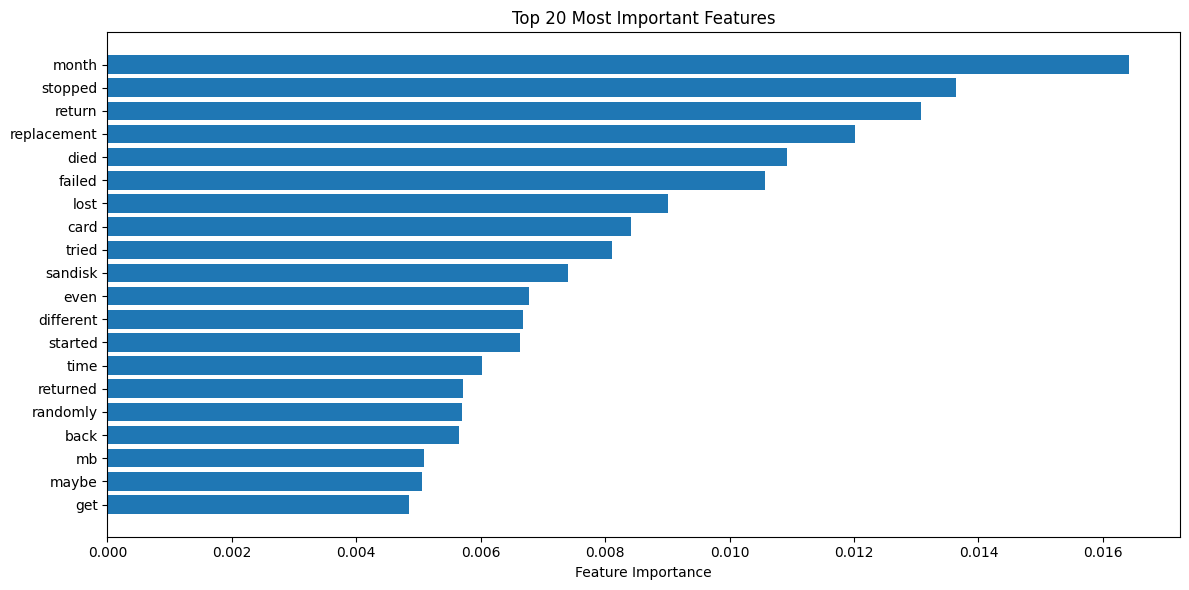


Performing Error Analysis...

Error Analysis - Sample Misclassified Reviews:

Review: bought able load music verizon lg android phone spent hour adding music card put android phone phone read anything memory card memory card gb gb worked fine must flaw memory card also memory card got stuck android phone slot use utility knife thin blade pull card
True Label: 0
Predicted Label: 1
--------------------------------------------------------------------------------

Review: bought day came great price finally showed month later knew going put galaxy note instantly recognized setspeeds laptop via included adapter ranged mb read speed mb write speed copied entire gb card one took time double space
True Label: 1
Predicted Label: 0
--------------------------------------------------------------------------------

Review: seemed work well first noticed phone started mountingunmounting card tried update music file card think failed computer longer see phone two connectedokay update since posted pr

In [26]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import numpy as np

# Model Performance Visualization
def plot_model_performance():
    # ROC Curve for all models
    plt.figure(figsize=(10, 6))
    for name, model in models.items():
        y_pred_proba = model.predict_proba(X_test_tfidf)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test_tfidf)
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend()
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    for name, model in models.items():
        y_pred_proba = model.predict_proba(X_test_tfidf)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test_tfidf)
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        plt.plot(recall, precision, label=name)
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves')
    plt.legend()
    plt.show()

# Feature Importance Analysis
def analyze_feature_importance():
    # Get feature names
    feature_names = tfidf.get_feature_names_out()
    
    # Get Random Forest feature importance
    rf_model = models['Random Forest']
    importances = rf_model.feature_importances_
    indices = np.argsort(importances)[-20:]  # Top 20 features
    
    # Plot feature importance
    plt.figure(figsize=(12, 6))
    plt.title('Top 20 Most Important Features')
    plt.barh(range(20), importances[indices])
    plt.yticks(range(20), [feature_names[i] for i in indices])
    plt.xlabel('Feature Importance')
    plt.tight_layout()
    plt.show()

# Error Analysis
def analyze_errors():
    # Get predictions from best model (Linear SVC based on previous results)
    best_model = models['Linear SVC']
    y_pred = best_model.predict(X_test_tfidf)
    
    # Find misclassified examples
    errors = X_test[y_test != y_pred]
    true_labels = y_test[y_test != y_pred]
    pred_labels = y_pred[y_test != y_pred]
    
    # Print some misclassified examples
    print("\nError Analysis - Sample Misclassified Reviews:")
    for i in range(min(5, len(errors))):
        print(f"\nReview: {errors.iloc[i]}")
        print(f"True Label: {true_labels.iloc[i]}")
        print(f"Predicted Label: {pred_labels[i]}")
        print("-" * 80)

# Run all evaluations
print("Model Evaluation Summary:")
print("=" * 80)
print("\nModel Performance Metrics:")
print(model_comparison)

print("\nGenerating Performance Plots...")
plot_model_performance()

print("\nAnalyzing Feature Importance...")
analyze_feature_importance()

print("\nPerforming Error Analysis...")
analyze_errors()

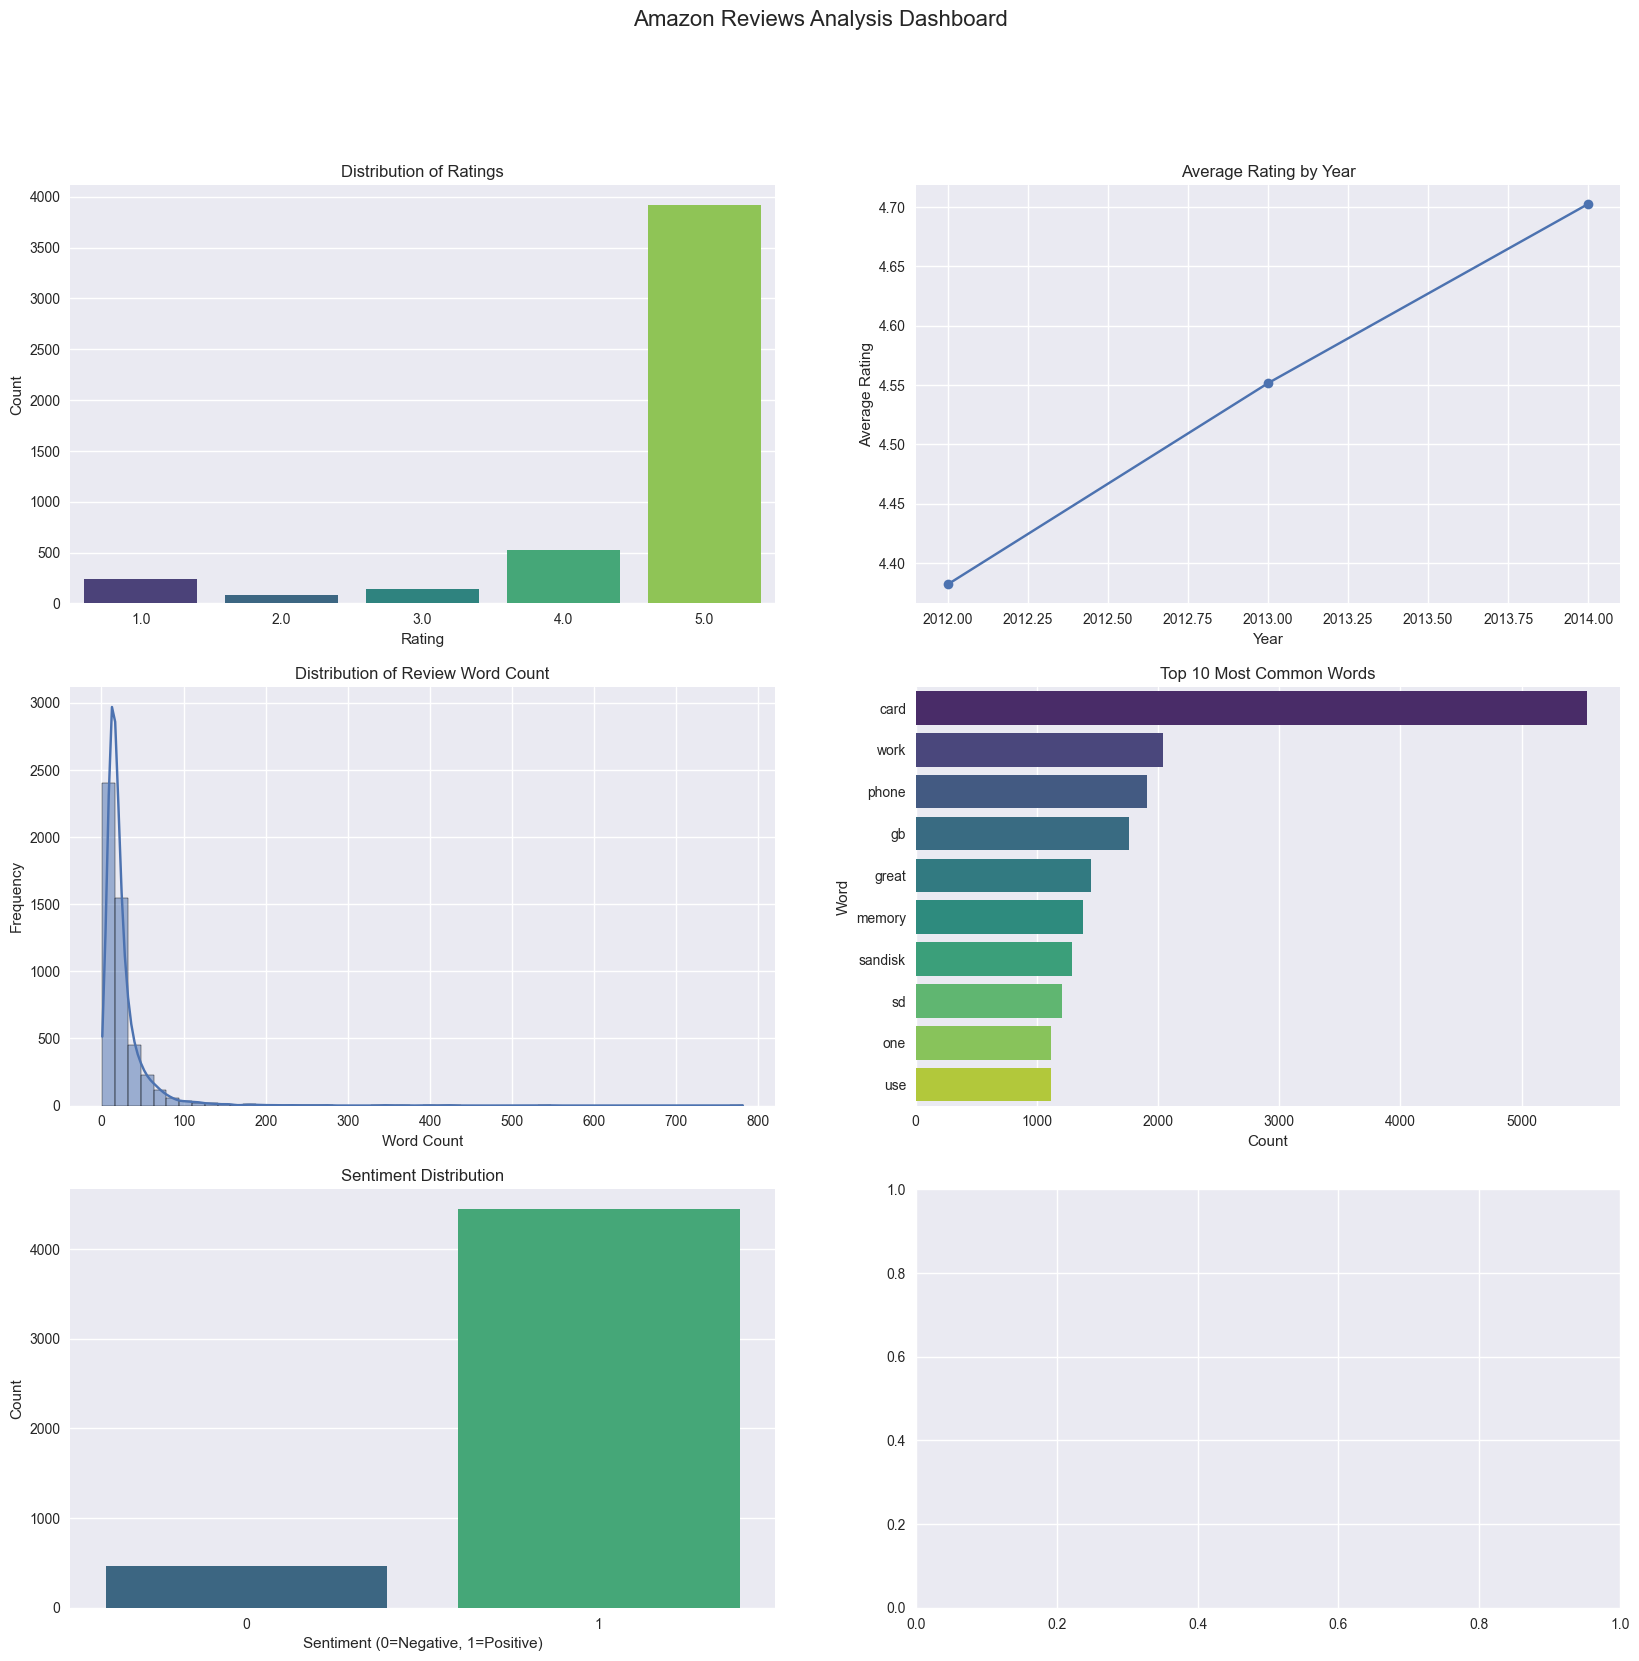

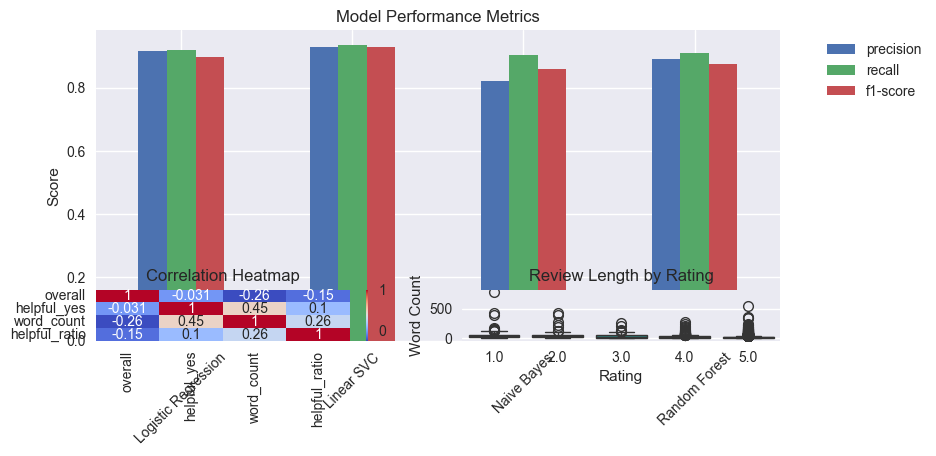


Key Statistics:
Total Reviews: 4913
Average Rating: 4.59
Positive Sentiment Percentage: 90.5%
Average Word Count: 25

Best Performing Model: Linear SVC (F1-Score: 0.929)


In [29]:
# Create a comprehensive dashboard of visualizations

import seaborn as sns

plt.style.use('seaborn-v0_8')  # or use 'seaborn-darkgrid' for an alternative style

# Create a figure with subplots
fig = plt.figure(figsize=(20, 25))
plt.suptitle('Amazon Reviews Analysis Dashboard', fontsize=16, y=0.95)

# 1. Rating Distribution
plt.subplot(4, 2, 1)
sns.countplot(data=df, x='overall', palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

# 2. Average Rating Over Time
plt.subplot(4, 2, 2)
df.groupby('review_year')['overall'].mean().plot(kind='line', marker='o')
plt.title('Average Rating by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')

# 3. Word Count Distribution
plt.subplot(4, 2, 3)
sns.histplot(data=df, x='word_count', bins=50, kde=True)
plt.title('Distribution of Review Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# 4. Top 10 Most Common Words
plt.subplot(4, 2, 4)
word_freq_df = pd.DataFrame(word_freq[:10], columns=['Word', 'Count'])
sns.barplot(data=word_freq_df, x='Count', y='Word', palette='viridis')
plt.title('Top 10 Most Common Words')

# 5. Sentiment Distribution
plt.subplot(4, 2, 5)
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment (0=Negative, 1=Positive)')
plt.ylabel('Count')

# 6. Model Performance Comparison
plt.subplot(4, 2, 6)
model_comparison.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Metrics')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 7. Correlation Heatmap
plt.subplot(4, 2, 7)
numeric_cols = ['overall', 'helpful_yes', 'word_count', 'helpful_ratio']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

# 8. Review Length vs Rating
plt.subplot(4, 2, 8)
sns.boxplot(data=df, x='overall', y='word_count', palette='viridis')
plt.title('Review Length by Rating')
plt.xlabel('Rating')
plt.ylabel('Word Count')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Additional insights
print("\nKey Statistics:")
print(f"Total Reviews: {len(df)}")
print(f"Average Rating: {df['overall'].mean():.2f}")
print(f"Positive Sentiment Percentage: {(df['sentiment'] == 1).mean()*100:.1f}%")
print(f"Average Word Count: {df['word_count'].mean():.0f}")
print(f"\nBest Performing Model: {model_comparison['f1-score'].idxmax()} (F1-Score: {model_comparison['f1-score'].max():.3f})")